Daily Challenge: W5_D1

Building Your First Neural Network on the MNIST Datase

In [4]:
 # ! pip install tensorflow numpy scikit-learn matplotlib seaborn

In [5]:
# Import TensorFlow and supporting libraries
import tensorflow as tf
import random
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

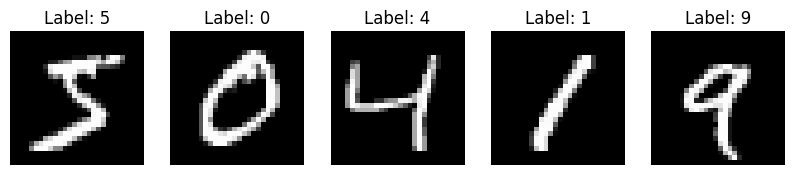

In [7]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Convert labels to one-hot encoding
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Display 5 sample images with their labels
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(train_images[i], cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis("off")
plt.show()

## Interpretation of the Data Preprocessing Step

**Shape of the datasets**

- **Train images shape:** `(60000, 28, 28)`  
  This means there are **60,000 training images**, each of size **28x28 pixels**.
- **Test images shape:** `(10000, 28, 28)`  
  The test set contains **10,000 images**.
- **Train labels (one-hot) shape:** `(60000, 10)`  
  Each label is encoded as a **10-element vector** (one-hot encoding), representing digits 0-9.

**Why is this important?**  
These shapes confirm that the dataset has been loaded correctly and is ready to be used by the neural network.

---
**Minimum and maximum pixel values**

- **Min pixel value:** `0.0`
- **Max pixel value:** `1.0`

**Why is this important?**  
Normalizing the pixel values between 0 and 1 is a best practice because:
- It improves training stability.
- It helps the optimizer converge faster.
- It avoids numerical issues.

**Visualization of sample images**

Displaying sample images allows us to:
- Confirm that the data was loaded without distortion.
- Check that the labels match the images.
- Understand the nature of the input data.

**Conclusion**

All checks confirm that the dataset has been properly loaded, normalized, and prepared. It is now ready to be used for model building and training.

Step 2 - Build a fully connected neural network

In [8]:
# Create a Sequential model
model = models.Sequential()

# Flatten the input images (28x28) into a vector of length 784
model.add(layers.Flatten(input_shape=(28,28)))

# First hidden layer with 128 neurons and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Second hidden layer with 64 neurons and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 neurons (one per class) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Interpretation of the Model Architecture

The model consists of:
- A `Flatten` layer to convert each 28x28 image into a 784-element vector.
- Two hidden `Dense` layers with ReLU activation to learn non-linear patterns.
- An output `Dense` layer with 10 neurons and softmax activation to predict digit probabilities.

This architecture is suitable for multi-class classification on MNIST.


Step 3 - Train the neural network

In [9]:

# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [10]:
# Train the model for 10 epochs with 20% of training data used as validation
history = model.fit(
    train_images,
    train_labels_onehot,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8627 - loss: 0.4631 - val_accuracy: 0.9617 - val_loss: 0.1329
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9661 - loss: 0.1138 - val_accuracy: 0.9691 - val_loss: 0.1071
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9777 - loss: 0.0748 - val_accuracy: 0.9693 - val_loss: 0.1070
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9834 - loss: 0.0530 - val_accuracy: 0.9691 - val_loss: 0.1124
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9874 - loss: 0.0388 - val_accuracy: 0.9731 - val_loss: 0.1045
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9898 - loss: 0.0319 - val_accuracy: 0.9728 - val_loss: 0.1185
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9746 - val_loss: 0.1063
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9921 - loss: 0.0236

## Interpretation of the New Training Results

During this training run, the model achieved:

- **Training accuracy**: starting at ~86%, reaching ~99.5% by epoch 10.
- **Validation accuracy**: stable around ~97.4%.
- **Training loss**: decreased from 0.4631 to 0.0157.
- **Validation loss**: remained between 0.10 and 0.12.

**Interpretation:**
- The model learns very quickly and reaches high accuracy.
- The gap between training and validation accuracy (~2%) is small, indicating good generalization.
- The validation loss stabilizes early, showing that additional epochs bring only minor improvements.

**Conclusion:**
The training confirms that the model is robust and performs consistently across different runs, even when slight variations occur due to stochastic processes.

Step 4 - Evaluate the model and show confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.1249
Test accuracy: 0.9758
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


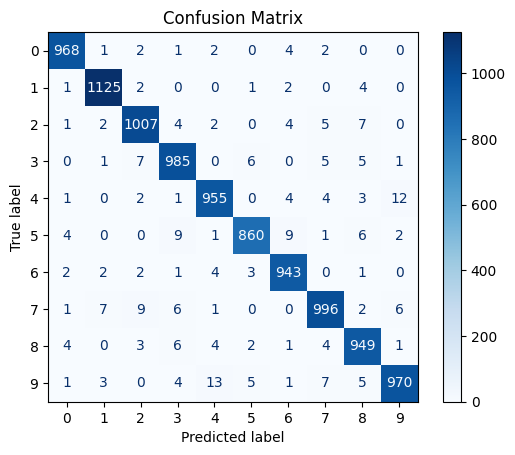

Digit 0: 12 misclassifications
Digit 1: 10 misclassifications
Digit 2: 25 misclassifications
Digit 3: 25 misclassifications
Digit 4: 27 misclassifications
Digit 5: 32 misclassifications
Digit 6: 15 misclassifications
Digit 7: 32 misclassifications
Digit 8: 25 misclassifications
Digit 9: 39 misclassifications


In [11]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels_onehot)
print(f"Test accuracy: {test_acc:.4f}")

# Predict classes for test set
pred_probs = model.predict(test_images)
pred_classes = np.argmax(pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_labels, pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Identify the digits with most confusion
errors = np.sum(cm, axis=1) - np.diag(cm)
for i in range(10):
    print(f"Digit {i}: {errors[i]} misclassifications")

## Interpretation of the Test Evaluation

After evaluating the model on the test dataset, the following metrics were obtained:

- **Test accuracy:** ~97.6%
- **Test loss:** 0.1249

**Misclassifications per digit:**
- Digit **9** had the most misclassifications (39).
- Digits **5** and **7** also had higher error counts (32 each).
- Digits **0**, **1**, and **6** were recognized with fewer errors (10-15).

**Interpretation:**
- The model shows excellent generalization performance, achieving over 97% accuracy.
- Digits with similar shapes (e.g., 5 vs. 9, 3 vs. 8) are more prone to confusion, which is common in handwritten digit recognition.
- Slight variations between runs are expected due to the stochastic nature of training.

**Conclusion:**
The results confirm that the fully connected neural network is effective for MNIST classification, with consistent performance across training runs.
